In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
from preprocessing.custom_transformers import CatFeatureEncoder, MissingValueHandler,NumFeatureScaler

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [ ]:
df = pd.read_csv('../train.csv')

: 

In [6]:
df.shape

(1460, 81)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Linear Regression Model

In [10]:
class LinearRegressionModel(BaseEstimator):
    def __init__(self, **kwargs):
        self.model = LinearRegression(**kwargs)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)

# Train

In [13]:
X = df.drop(columns=["SalePrice", "Id"])
Y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [14]:
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [17]:
pipeline = Pipeline([
    ('missing_handler', MissingValueHandler(threshold=0.4, num_strategy='median', cat_strategy='mode')),
    ('num_scaler', NumFeatureScaler(num_cols=num_cols)),
    ('cat_encoder', CatFeatureEncoder(cat_cols=cat_cols, strategy='onehot')),
    ('regressor', LinearRegressionModel())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold RMSE: 29225.539082295476
Fold RMSE: 38146.92422968225


d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Fold RMSE: 48013.60922988613
Fold RMSE: 25954.48820760323
Fold RMSE: 38080.972270269
Average CV RMSE: 35884.30660394722
Test RMSE: 30310.999208253488


d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


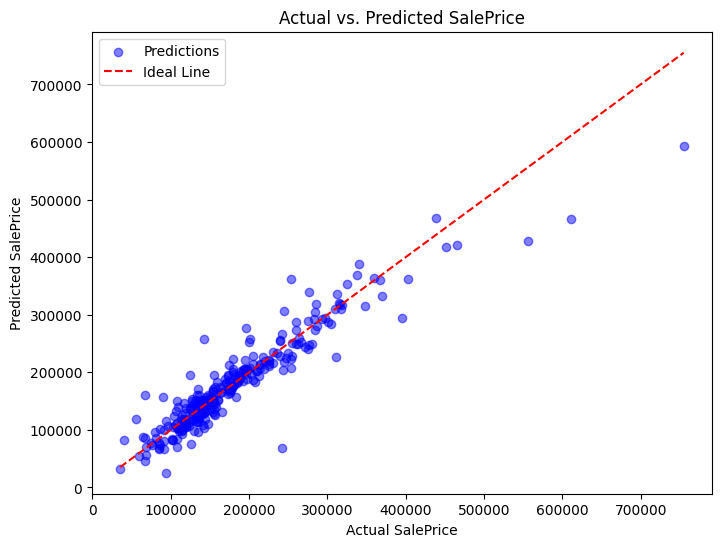

In [18]:
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    pipeline.fit(X_train_cv, y_train_cv)
    
    y_pred = pipeline.predict(X_val_cv)
    
    rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
    scores.append(rmse)
    print(f"Fold RMSE: {rmse}")


print(f"Average CV RMSE: {np.mean(scores)}")

y_test_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test RMSE: {rmse}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.legend()
plt.show()


In [2]:
import dagshub
dagshub.init(repo_owner='losaberidzebadri', repo_name='House-Prices-Regression', mlflow=True)

Accessing as losaberidzebadri

Initialized MLflow to track repo "losaberidzebadri/House-Prices-Regression"

Repository losaberidzebadri/House-Prices-Regression initialized!

d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\FreeUni\Semester 6\ML\House-Prices-Regression\myenv\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
2025/04/06 15:28:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



=== Linear Regression Summary ===
Train RMSE: 19917.01 | MAE: 12910.78 | R²: 0.9335
Test  RMSE: 29680.09 | MAE: 18377.20 | R²: 0.8852
Avg CV RMSE: 35884.31

Experiment logged to MLflow. Run ID: c3760d95d69640809450734e8d18c379
🏃 View run LinearRegression at: https://dagshub.com/losaberidzebadri/House-Prices-Regression.mlflow/#/experiments/1/runs/c3760d95d69640809450734e8d18c379
🧪 View experiment at: https://dagshub.com/losaberidzebadri/House-Prices-Regression.mlflow/#/experiments/1


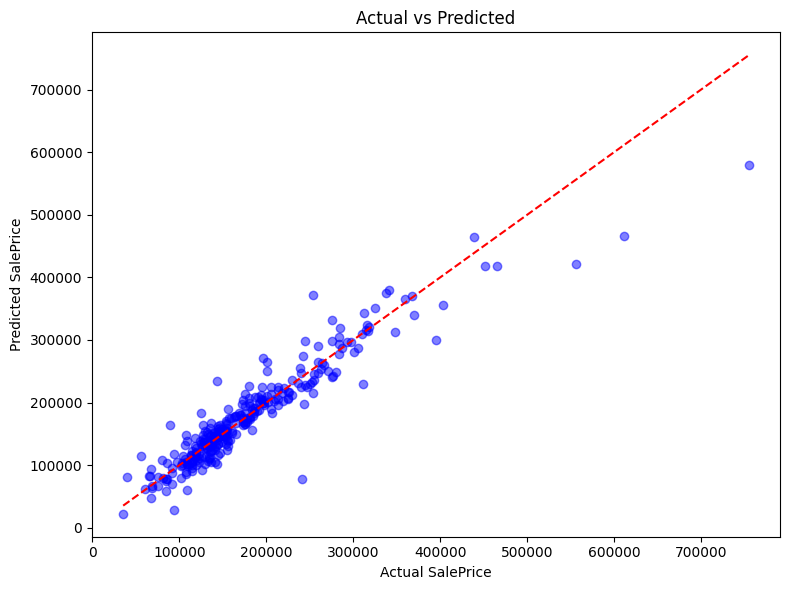

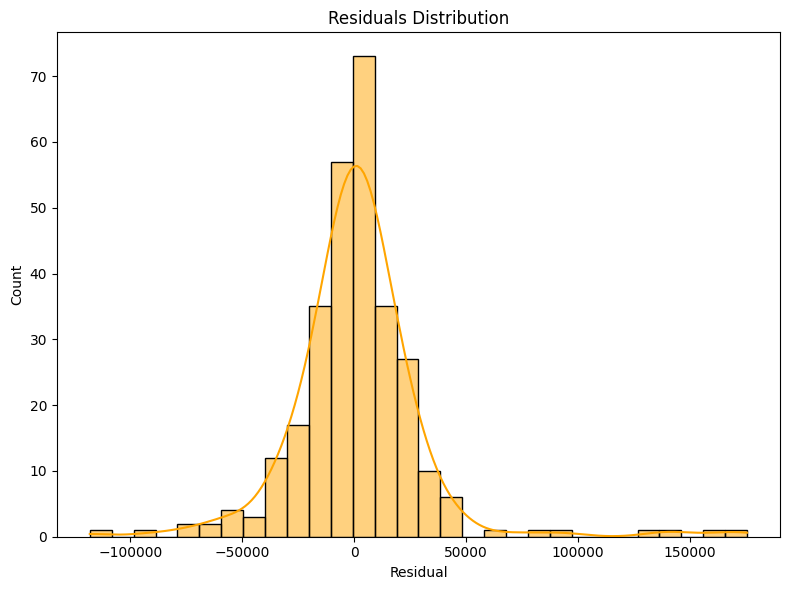

: 

In [ ]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Set experiment name
experiment_name = "Linear Regression Baseline"
run_name = "LinearRegression"

# Set up MLflow experiment
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):
    
    # ==== Fit pipeline and make predictions ====
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # ==== Log model parameters ====
    mlflow.log_param("model", "LinearRegression")
    mlflow.log_param("missing_threshold", 0.4)
    mlflow.log_param("num_strategy", "median")
    mlflow.log_param("cat_strategy", "mode")
    
    # ==== Cross-validation RMSEs ====
    for i, score in enumerate(scores):
        mlflow.log_metric(f"fold_{i+1}_rmse", score)
    mlflow.log_metric("cv_rmse_avg", np.mean(scores))
    
    # ==== Regression Metrics ====
    def log_regression_metrics(y_true, y_pred, prefix="test"):
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        mlflow.log_metric(f"{prefix}_rmse", rmse)
        mlflow.log_metric(f"{prefix}_mae", mae)
        mlflow.log_metric(f"{prefix}_r2", r2)
        return rmse, mae, r2

    train_rmse, train_mae, train_r2 = log_regression_metrics(y_train, y_pred_train, prefix="train")
    test_rmse, test_mae, test_r2 = log_regression_metrics(y_test, y_pred_test, prefix="test")

    # ==== Visualizations ====
    os.makedirs("plots", exist_ok=True)

    # 1. Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.title("Actual vs Predicted")
    plt.tight_layout()
    plt.savefig("plots/actual_vs_predicted.png")
    mlflow.log_artifact("plots/actual_vs_predicted.png")

    # 2. Residual Plot
    residuals = y_test - y_pred_test
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color="orange")
    plt.title("Residuals Distribution")
    plt.xlabel("Residual")
    plt.tight_layout()
    plt.savefig("plots/residuals.png")
    mlflow.log_artifact("plots/residuals.png")

    # ==== Log model ====
    mlflow.sklearn.log_model(pipeline, "linear_regression_model")

    # ==== Summary ====
    print("\n=== Linear Regression Summary ===")
    print(f"Train RMSE: {train_rmse:.2f} | MAE: {train_mae:.2f} | R²: {train_r2:.4f}")
    print(f"Test  RMSE: {test_rmse:.2f} | MAE: {test_mae:.2f} | R²: {test_r2:.4f}")
    print(f"Avg CV RMSE: {np.mean(scores):.2f}")
    print("\nExperiment logged to MLflow. Run ID:", mlflow.active_run().info.run_id)
